In [ ]:
from hyperbox_app.distributed.networks.nasbench201 import NASBench201Network
from hyperbox.mutator import RandomMutator
from copy import deepcopy
import torch
import skdim
import numpy as np
import json
import itertools
from glob import glob
from hyperbox_app.distributed.engine.fewshot_search import lid_term_torch
from hyperbox.utils.utils import save_arch_to_json, load_json

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from ipdb import set_trace

In [3]:
path = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_fewshot_search_nb201_c10_grad_mincut_fp_16splits_loadparent_1nets_sgdlr0.01/2022-07-22_08-56-57/evolution_logs/checkpoint.pth.tar'


In [4]:
ckpt = torch.load(path)

In [5]:
def plot_ea_memory(
    paths, figsize=(8,8), filename=None, legend_loc=(1.15, 1.0), fontsize=16, debug=False
    ):
    if debug: set_trace()
    marker = ['o', 'x']
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    fig = plt.figure(num=1, figsize=figsize)
    ax = fig.add_subplot(111)
    for idx, path in enumerate(paths):
        ckpt = torch.load(path)
        memory = ckpt['memory']

        num_epochs = len(memory)

        epochs = list(range(num_epochs))
        real_perfs = []
        proxy_perfs = []
        real_std = []
        proxy_std = []
        for epoch in range(num_epochs):
            memory_epoch = memory[epoch]
            real_perfs.append(np.mean([m['real_perf'] for m in memory_epoch]))
            real_std.append(np.std([m['real_perf'] for m in memory_epoch])**0.5)
            proxy_perfs.append(np.mean([m['proxy_perf']*100 for m in memory_epoch]))
            proxy_std.append(np.std([m['proxy_perf']*100 for m in memory_epoch])**0.5)
        if 'grad' in path:
            label = 'Grad'
        else:
            label = 'ID'
        ax.errorbar(epochs, real_perfs, yerr=real_std, label=f'{label}_real_perf', color=colors[idx], marker='o')
        # ax.errorbar(epochs, proxy_perfs, yerr=proxy_std, label=f'{label}', color=colors[idx], marker=marker[idx])
        # ax.plot(epochs, real_perfs, c=colors[idx], marker='o', label=f'{label}_real_perf')
        # ax.plot(epochs, proxy_perfs, c=colors[idx], marker='x', label=f'{label}_proxy_perf')

        ax.legend(loc='upper center', borderaxespad=0., ncol=2, fontsize=15)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Evolution epochs', fontsize=16)
    plt.ylabel('Validation accuracy(%)', fontsize=16)
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    plt.show()

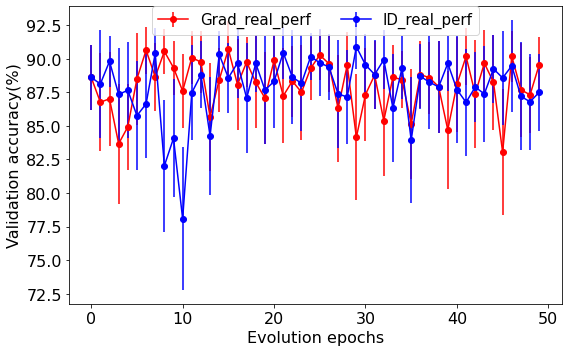

In [6]:
paths = [
    path,
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_fewshot_search_nb201_c10_ID_mincut_sp_16splits_loadparent_1nets_sgdlr0.01/2022-07-22_08-55-21/evolution_logs/checkpoint.pth.tar'
]
plot_ea_memory(paths, filename='ea_search.pdf',debug=False, figsize=(8,5))

In [ ]:
def plot_ea_memory(
    path, figsize=(8,8), filename=None, legend_loc=(1.15, 1.0), fontsize=16
    ):
    ckpt = torch.load(path)
    memory = ckpt['memory']

    fig = plt.figure(num=1, figsize=figsize)
    ax = fig.add_subplot(111)
    num_epochs = len(memory)

    epochs = list(range(num_epochs))
    real_perfs = []
    proxy_perfs = []
    for epoch in range(num_epochs):
        memory_epoch = memory[epoch]
        real_perfs.append(max([m['real_perf'] for m in memory_epoch]))
        proxy_perfs.append(max([m['proxy_perf']*100 for m in memory_epoch]))
    ax.plot(epochs, real_perfs, c='b', marker='o')
    ax.plot(epochs, proxy_perfs, c='r', marker='x')

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('evolution epochs', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [ ]:
nb201_IDs = torch.load('/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/networks/nasbench201/all_masks_IDs.pt')
nb201_IDs.keys()
